# Notebook 33: Dip isogons

A dip isogon is a line from the top to the base of a folded layer, joining points of equal dip. See the figure below from [Ragan (2009)](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#).

<img src="../figures/isogon.png" alt="isogon" width="400" style="display: block; margin: 0 auto"/><br><br>

If we know the coordinates of points on the layers, it is rather simple to draw the isogons using Python. Let's do the following example from Rowland et al. (2007, their figure G-13). For the fold below, draw isogons at 10° intervals for each layer. Indicate the fold class of each layer.

<img src="../figures/fold_isogons.png" alt="fold_isogons" width="500" style="display: block; margin: 0 auto"/><br><br>

The layers have been digitized (this is the most difficult part), and their coordinates are in the [data/isogons](../data/isogons/) folder. The code below reads the layers, assigns them ids, and compute their dips. Then it plots the layers colored by their dips.

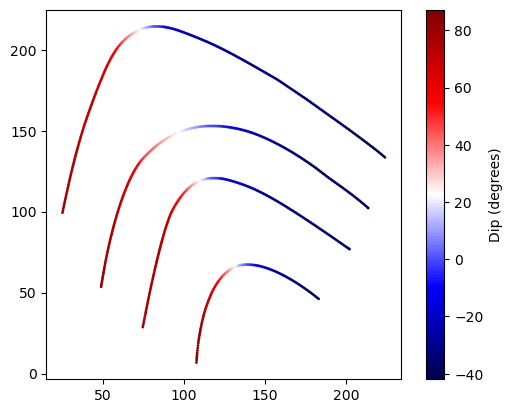

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# remove warnings
np.seterr(divide='ignore', invalid='ignore')

# number of layers
n_layers = 4
# create a list to hold the layers
layers = []
# loop through the layers
for i in range(n_layers):
    # layer
    layer = np.loadtxt(os.path.join("..", "data", "isogons", f"layer{i+1}.txt"))
    # add an id column to the layer
    layer = np.hstack((layer, np.ones((layer.shape[0],1)) * i))
    # calculate the slopes of the layer
    slopes = np.gradient(layer[:,1], layer[:,0])
    # calculate the dips of the layer
    dips = np.arctan(slopes) * 180 / np.pi
    # add the dips to the layer as a new column
    layer = np.hstack((layer, dips[:,None]))
    # append the layer to the list of layers
    layers.append(layer)

# concatenate the layers into a single array
layers = np.vstack(layers)

# plot the layers colored by dip
fig, ax = plt.subplots()

sc = ax.scatter(layers[:,0], layers[:,1], s=1, c=layers[:,3], cmap='seismic')
fig.colorbar(sc, ax=ax, label='Dip (degrees)')
ax.set_aspect('equal')

plt.show()

Since we know the dips along the layers, we can now compute isogons at 10° intervals. The cell below does that.

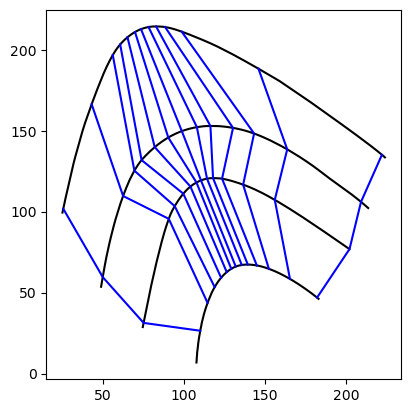

In [2]:
fig, ax = plt.subplots()
# plot the layers
for i in range(n_layers):
    layer = layers[layers[:,2] == i]
    ax.plot(layer[:,0], layer[:,1], 'k-')

# Now, estimate and plot the isogons
isog_int = 10 # isogon interval in degrees
isog_min = -40 # minimum isogon value in degrees
isog_max = 80 # maximum isogon value in degrees
isogons = np.arange(isog_min, isog_max+isog_int, isog_int)

isog_points = [] # list to hold isogon points

# For each isogon
for isogon in isogons:
    # For each layer
    for i in range(n_layers):
        # extract the layer by id
        layer = layers[layers[:,2] == i]
        # extract the x and y coordinates of the layer
        # at which the angle is closest to the isogon
        index = np.argmin(np.abs(layer[:,3] - isogon))
        x = layer[index,0]
        y = layer[index,1]
        # add the coordinates to the list of isogon points
        isog_points.append([x,y])
    # if more than two isogon points
    if len(isog_points) > 1:
        # plot the isogon
        isog_points = np.array(isog_points)
        ax.plot(isog_points[:,0], isog_points[:,1], 'b-')
    # clear the list of isogon points
    isog_points = []

ax.set_aspect('equal')
plt.show()

The lowermost layer has about parallell isogons (class 2). The intermediate layer has converging isogons, perpendicular to the layers (class 1B, parallel fold). The uppermost layer has diverging isogons (class 3).